Shauna Smith

Bellevue University - DSC 540

Professor: Prof. Williams

Milestone 5 - "Final Project"

(02/20/23 - 03/04/23)

# Milestone 5 - Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

# API Data Source:
KAGGLE API https://www.kaggle.com/docs/api

*As world temperature/city_temperature (https://www.kaggle.com/datasets/subhamjain/temperature-of-all-countries-19952020/download?datasetVersionNumber=1/city_temperature.csv)

# Website Data Source:

Website: Wikipedia - "List of countries and territories by extreme temperatures"
"https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_extreme_temperatures"

# File Data(merged) Source:
-(1.) From Kaggle (https://ourworldindata.org/age-structure) *age group populations as xlsx: ("C:/Users/Shaun/OneDrive/Documents/historic-and-un-pop-projections-by-age (1).xlsx")

-(2.) From Kaggle (https://www.kaggle.com/datasets/eliasturk/world-happiness-based-on-cpi-20152020?select=WorldHappiness_Corruption_2015_2020.csv) *WorldHappiness_Corruption "SAVED AS" xlsx: ("C:\Users\Shaun\OneDrive\Documents\WorldHappiness_Corrupt_2015_2020.xlsx")

In [1]:
#File data
import pandas as pd

In [2]:
df11 = pd.read_excel("C:/Users/Shaun/OneDrive/Documents/historic-and-un-pop-projections-by-age (1).xlsx")

In [3]:
df111=df11.loc[df11['Year']<=int('2014')].index
df11=df11.drop(df111)

In [4]:
df1111=df11.loc[df11['Year']>=int('2021')].index
df11=df11.drop(df1111)

In [5]:
df1=df11

In [6]:
#merge of datasets
df22 = pd.read_excel("C:/Users/Shaun/OneDrive/Documents/WorldHappiness_Corrupt_2015_2020.xlsx")

In [7]:
df1 = df1.rename({'Entity':'Country'}, axis=1)
#(Wdf="Wide Data Frame" as 2 excel flat files combined)
Wdf = pd.merge(df1, df22, on='Country')
Wdf = Wdf.drop(['Code','cpi_score','continent','Year_y'], axis=1)

In [8]:
#API data
!pip install kaggle
import requests
!pip install opendatasets

In [9]:
import opendatasets as od
import pandas as pd
 
od.download("https://www.kaggle.com/datasets/subhamjain/temperature-of-all-countries-19952020/download?datasetVersionNumber=1")

Skipping, found downloaded files in ".\temperature-of-all-countries-19952020" (use force=True to force download)


In [10]:
file =('./temperature-of-all-countries-19952020/city_temperature.csv')
APIData = pd.read_csv(file,low_memory=False)

In [11]:
APIData.head(2)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4


In [12]:
AD=APIData.drop(['Region','State','City','Month','Day',], axis=1)

In [13]:
AD=AD.rename(columns={'AvgTemperature':'AvgTemp'})

In [14]:
AD=AD.drop_duplicates(subset='Country',keep='last')
AD.head(2)

,Country,Year,AvgTemp
9265,Algeria,2020,60.8
13808,Burundi,2007,48.2


In [15]:
ADdrop=AD.loc[AD['Year']<=int('2019')].index
AD=AD.drop(ADdrop)
AD=AD.drop_duplicates(subset='Country',keep='last')
AD=AD.drop(['Year'], axis=1)

In [16]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bounds=Q1-1.5*IQR
    upper_bounds=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_bounds) | (df[ft]>upper_bounds)]
    return ls

In [17]:
indexed_ls=[]
for feature in ['AvgTemp']:
    indexed_ls.extend(outliers(AD, feature))


In [18]:
def remove_out(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [19]:
DFC=remove_out(AD,indexed_ls)
AD=DFC
AD = AD.reset_index(drop=True)
AD.head()

,Country,AvgTemp
0,Algeria,60.8
1,Benin,83.5
2,Central African Republic,79.2
3,Congo,74.8
4,Egypt,69.0


In [20]:
#merging api and file data as (WDF= WIDE Data Frame due to containing APIdf & 2 flat file df(s) combined)
WDF=pd.merge(Wdf,AD, on='Country')

In [21]:
WDF_cols=['country','year','all_age_est','all_age_med','65+_est','65+_med','25_64_est','25_64_med','0_24_med','0_24_est',
         '0_14_est','0_14_med','0_4_est','sexgroup_0_4_med','happy_score','gdp','family','health',
         'freedoms','generosity','govt_trust','dystopia_res','supports','avg_temp']

In [22]:
WDF.columns = WDF_cols

In [23]:
WDF=WDF.drop(['all_age_med','65+_med','25_64_med','0_24_med','0_14_med','sexgroup_0_4_med'], axis=1)

In [24]:
WDF['stability_diff'] = WDF['65+_est'] - WDF['0_24_est']
WDF.loc[WDF['stability_diff'] >= 0, 'stability_score']= 1
WDF.loc[WDF['stability_diff'] < 0, 'stability_score']= 0

In [25]:
WDF.loc[WDF['happy_score'] >= 5.3, 'happieness']='Good'
WDF.loc[WDF['happy_score'] <5.3, 'happiness']= 'Poor'

In [26]:
WDF['hopefulness'] = WDF['happy_score'] + WDF['health'] + WDF['freedoms'] + WDF['stability_score'] + WDF['generosity']

In [27]:
WDF.loc[WDF['hopefulness'] >= 6.6, 'predictions']='bright'
WDF.loc[WDF['hopefulness'] <6.6, 'predictions']= 'grim'

In [28]:
WDF['resoure_potential'] = WDF['gdp'] + WDF['health'] + WDF['freedoms'] + WDF['stability_score'] + WDF['govt_trust'] + WDF['dystopia_res'] + WDF['supports']

In [29]:
WDF.loc[WDF['resoure_potential'] >= 4.5, 'resources_score']= 1
WDF.loc[WDF['resoure_potential'] < 4.5, 'resources_score']= 0

In [30]:
WDF.loc[WDF['resources_score'] ==1, 'successfulness']= 'potential_survival'
WDF.loc[WDF['resources_score'] ==0, 'successfulness']= 'inevitable_extinction'

In [31]:
WDF['country_wellness'] = WDF['happy_score'] + WDF['resources_score'] + WDF['hopefulness'] + WDF['stability_score']

In [32]:
WDF.loc[WDF['country_wellness'] >= 12.4, 'wellness_score']= 1
WDF.loc[WDF['country_wellness'] < 12.4, 'wellness_score']= 0

In [33]:
WDF.loc[WDF['wellness_score'] ==1, 'status']= 'thriving'
WDF.loc[WDF['wellness_score'] ==0, 'status']= 'infirmed'

In [34]:
import numpy as np
def find_outlier(df,x):
    q1=df[x].quantile(.25)
    q3=df[x].quantile(.75)
    iqr=q3-q1
    df['quantiles_score']=np.where(df[[x]]<(q1-1.5*iqr),-1,
                                  np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    return df

In [35]:
find_outlier(WDF, 'stability_diff')

,country,year,all_age_est,65+_est,25_64_est,0_24_est,0_14_est,0_4_est,happy_score,gdp,...,happiness,hopefulness,predictions,resoure_potential,resources_score,successfulness,country_wellness,wellness_score,status,quantiles_score
0,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.6440,0.996193,...,Poor,5.957971,grim,3.639157,0.0,inevitable_extinction,10.601971,0.0,infirmed,1
1,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.9590,0.878670,...,Poor,6.272300,grim,4.012320,0.0,inevitable_extinction,11.231300,0.0,infirmed,1
2,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.7190,0.947000,...,Poor,6.154000,grim,3.079000,0.0,inevitable_extinction,10.873000,0.0,infirmed,1
3,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.5860,0.916000,...,Poor,5.944000,grim,2.974000,0.0,inevitable_extinction,10.530000,0.0,infirmed,1
4,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.6550,0.955300,...,Poor,5.872130,grim,3.985200,0.0,inevitable_extinction,10.527130,0.0,infirmed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Vietnam,2020,96648680.0,8144979.0,52635890.0,35867816.0,21932616.0,7429597.0,5.3600,0.632160,...,NaN,6.869800,bright,4.279500,0.0,inevitable_extinction,12.229800,0.0,infirmed,1
2912,Vietnam,2020,96648680.0,8144979.0,52635890.0,35867816.0,21932616.0,7429597.0,5.1750,0.741000,...,Poor,6.716000,bright,3.554000,0.0,inevitable_extinction,11.891000,0.0,infirmed,1
2913,Vietnam,2020,96648680.0,8144979.0,52635890.0,35867816.0,21932616.0,7429597.0,5.1030,0.715000,...,Poor,6.600000,bright,3.479000,0.0,inevitable_extinction,11.703000,0.0,infirmed,1
2914,Vietnam,2020,96648680.0,8144979.0,52635890.0,35867816.0,21932616.0,7429597.0,5.0610,0.740370,...,Poor,6.532860,grim,4.018840,0.0,inevitable_extinction,11.593860,0.0,infirmed,1


In [36]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    
    lower_boundry=q1-1.5*iqr
    upper_boundry=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_boundry)|(df[ft]>upper_boundry)]
    
    return ls

In [37]:
outliers(WDF,'stability_diff')

Int64Index([ 360,  361,  362,  363,  364,  365,  366,  367,  368,  369,
            ...
            2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483],
           dtype='int64', length=390)

In [38]:
index_list=[]
for features in ['stability_diff']:
    index_list.extend(outliers(WDF,features))

In [39]:
def remove_outliers_list(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [40]:
squeeky_clean=remove_outliers_list(WDF,index_list)
df=squeeky_clean

In [41]:
#Website data
def wiki_list_of_countries(url= "https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_extreme_temperatures"):
    import requests
    from bs4 import BeautifulSoup
    
    wiki_home =str(url)
    response = requests.get(wiki_home)
    
    def status_check(r):
        if r.status_code==200:
            return 1
        else:
            return -1
        
        status = status_check(response)
        if status==1:
            contents = decode_content(response. encoding_check(response))
        else:
            print("Sorry, could not reach the web page")
            return -1
        soup= BeautifulSoup (contents, 'html.parser')
        text_list=[]
        for d in soup.find_all('div'):
            if (d.get('id')=='mw-content-text'):
                for i in d.find_all('ul'):
                    text_list.append(i.text)
                    
        return(text_list[0])

In [42]:
url = ("https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_extreme_temperatures")
list_df = pd.read_html(url)

dfl = list_df[0]

In [43]:
from bs4 import BeautifulSoup

In [44]:
webdf = dfl.rename({'Country/Region':'country'}, axis=1)
webdf['country'] = webdf.country.str.replace('*','', regex=True)
webdf = webdf.drop(['Town/Location', 'Town/Location.1', 'Range','Date','Date.1'], axis=1)
webdf['Coldest'] = webdf['Coldest'].fillna(method='ffill')
webdf['Hottest'] = webdf['Hottest'].fillna(method='bfill')

In [45]:
webdf.tail(2)

,country,Coldest,Hottest
119,Samoa,11.1 °C52.0 °F,35.3 °C95.5 °F
120,Solomon Islands,11.1 °C52.0 °F,36.1 °C97.0 °F


In [46]:
webdf.dtypes

country    object
Coldest    object
Hottest    object
dtype: object

In [47]:
webdf.shape

(121, 3)

In [48]:
df.head(2)

,country,year,all_age_est,65+_est,25_64_est,0_24_est,0_14_est,0_4_est,happy_score,gdp,...,happiness,hopefulness,predictions,resoure_potential,resources_score,successfulness,country_wellness,wellness_score,status,quantiles_score
0,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.644,0.996193,...,Poor,5.957971,grim,3.639157,0.0,inevitable_extinction,10.601971,0.0,infirmed,1
1,Albania,2015,2882482.0,390100.0,1473157.0,1019225.0,523652.0,167618.0,4.959,0.878670,...,Poor,6.272300,grim,4.012320,0.0,inevitable_extinction,11.231300,0.0,infirmed,1


In [49]:
df.dtypes

country               object
year                   int64
all_age_est          float64
65+_est              float64
25_64_est            float64
0_24_est             float64
0_14_est             float64
0_4_est              float64
happy_score          float64
gdp                  float64
family               float64
health               float64
freedoms             float64
generosity           float64
govt_trust           float64
dystopia_res         float64
supports             float64
avg_temp             float64
stability_diff       float64
stability_score      float64
happieness            object
happiness             object
hopefulness          float64
predictions           object
resoure_potential    float64
resources_score      float64
successfulness        object
country_wellness     float64
wellness_score       float64
status                object
quantiles_score        int32
dtype: object

In [50]:
#Loading both Data Frames into an sql and pulling the selected data for visualization purposes in python
import sqlite3

In [51]:
df.columns=df.columns.str.strip()

In [52]:
connection=sqlite3.connect('maindf.db')

In [53]:
df.to_sql('countries', connection, if_exists='replace')

2526

In [54]:
connection.commit()

In [56]:
df.happy_score.max()

7.808700085

In [86]:
with sqlite3.connect('maindf.db')as connection:
    c=connection.cursor()
    rows = c.execute("""
    SELECT country, year, happy_score 
    FROM countries 
    WHERE happy_score>7""")
    for row in rows:
        print("Country = ", row[0])
        print("year = ", row[1])
        print("Happieness Score = ", row[2], "\n")

Country =  Australia
year =  2015
Happieness Score =  7.28399992 

Country =  Australia
year =  2015
Happieness Score =  7.284 

Country =  Australia
year =  2015
Happieness Score =  7.228 

Country =  Australia
year =  2015
Happieness Score =  7.272 

Country =  Australia
year =  2015
Happieness Score =  7.313 

Country =  Australia
year =  2015
Happieness Score =  7.222799778 

Country =  Australia
year =  2016
Happieness Score =  7.28399992 

Country =  Australia
year =  2016
Happieness Score =  7.284 

Country =  Australia
year =  2016
Happieness Score =  7.228 

Country =  Australia
year =  2016
Happieness Score =  7.272 

Country =  Australia
year =  2016
Happieness Score =  7.313 

Country =  Australia
year =  2016
Happieness Score =  7.222799778 

Country =  Australia
year =  2017
Happieness Score =  7.28399992 

Country =  Australia
year =  2017
Happieness Score =  7.284 

Country =  Australia
year =  2017
Happieness Score =  7.228 

Country =  Australia
year =  2017
Happienes

In [87]:
connection.close()

In [107]:
webdf.columns=webdf.columns.str.strip('\u202f')

In [108]:
webdf.columns

Index(['country', 'Coldest', 'Hottest'], dtype='object')

In [111]:
webdf['country'] = webdf['country'].str.strip()

In [112]:
webdf.country.unique()

array(['Algeria', 'Botswana', 'Burkina Faso', 'Chad', 'Ghana', 'Niger',
       'Nigeria', 'Egypt', 'Bahrain', 'Lesotho', 'Morocco',
       'South Africa', 'Sudan', 'Eswatini', 'Tunisia', 'Western Sahara',
       'Zambia', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Bhutan', 'Cambodia', 'China, mainland', 'Hong Kong', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
       'North Korea', 'Oman', 'Pakistan', 'Philippines', 'Qatar',
       'Saudi Arabia', 'Singapore', 'South Korea', 'Syria', 'Taiwan',
       'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan',
       'United Arab Emirates', 'Vietnam', 'Albania', 'Austria', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland

In [129]:
import sqlite3
conn=sqlite3.connect('maindf.db')

In [130]:
webdf.to_sql('temperatures', conn, if_exists='replace')

121

In [131]:
conn.commit()

In [132]:
#JOIN
with sqlite3.connect('maindf.db')as conn:
    c=conn.cursor()

    c.execute('PRAGMA forgeign_keys =1')
    sql=""" SELECT *
    FROM temperatures
    JOIN countries ON temperatures.country = countries.country
    WHERE countries.country = 'Austria'
    """
    rows=c.execute(sql)
    for row in rows:
        print(row)

(59, 'Austria', '−52.6\xa0°C−62.7\xa0°F', '40.5\xa0°C104.9\xa0°F', 144, 'Austria', 2015, 8642422.0, 1594062.0, 4797114.0, 2251246.0, 1236469.0, 411087.0, 7.006000042, 1.487097263, 1.459944963, 0.815328419, 0.56776619, 0.316472322, 0.221060365, 2.138506413, 0.0, 42.8, -657184.0, 0.0, 'Good', None, 8.705566973, 'bright', 5.22975865, 1.0, 'potential_survival', 16.711567015, 1.0, 'thriving', 1)
(59, 'Austria', '−52.6\xa0°C−62.7\xa0°F', '40.5\xa0°C104.9\xa0°F', 145, 'Austria', 2015, 8642422.0, 1594062.0, 4797114.0, 2251246.0, 1236469.0, 411087.0, 7.2, 1.33723, 1.29704, 0.89042, 0.62433, 0.33088, 0.18676, 2.5332, 0.0, 42.8, -657184.0, 0.0, 'Good', None, 9.045630000000001, 'bright', 5.57194, 1.0, 'potential_survival', 17.24563, 1.0, 'thriving', 1)
(59, 'Austria', '−52.6\xa0°C−62.7\xa0°F', '40.5\xa0°C104.9\xa0°F', 146, 'Austria', 2015, 8642422.0, 1594062.0, 4797114.0, 2251246.0, 1236469.0, 411087.0, 7.246, 1.376, 0.0, 1.016, 0.532, 0.244, 0.226, 0.0, 1.475, 42.8, -657184.0, 0.0, 'Good', None, 

In [133]:
conn.close()

In [118]:
#Select
import sqlite3
conn=sqlite3.connect('maindf.db')
c=conn.cursor()

rows = c.execute("""SELECT temperatures.country, countries.happy_score 
FROM temperatures, countries 
WHERE countries.country = temperatures.country 
AND countries.happy_score > 7""")
for row in rows:
    print("country = ", row[0])
    print("Happieness Score = ", row[1], "\n")

country =  Australia
Happieness Score =  7.28399992 

country =  Australia
Happieness Score =  7.284 

country =  Australia
Happieness Score =  7.228 

country =  Australia
Happieness Score =  7.272 

country =  Australia
Happieness Score =  7.313 

country =  Australia
Happieness Score =  7.222799778 

country =  Australia
Happieness Score =  7.28399992 

country =  Australia
Happieness Score =  7.284 

country =  Australia
Happieness Score =  7.228 

country =  Australia
Happieness Score =  7.272 

country =  Australia
Happieness Score =  7.313 

country =  Australia
Happieness Score =  7.222799778 

country =  Australia
Happieness Score =  7.28399992 

country =  Australia
Happieness Score =  7.284 

country =  Australia
Happieness Score =  7.228 

country =  Australia
Happieness Score =  7.272 

country =  Australia
Happieness Score =  7.313 

country =  Australia
Happieness Score =  7.222799778 

country =  Australia
Happieness Score =  7.28399992 

country =  Australia
Happieness

In [119]:
conn.close()

In [138]:
#Join & Select
import sqlite3
conn=sqlite3.connect('maindf.db')
cursor=conn.cursor()

cursor.execute('PRAGMA forgeign_keys =1')
sql="""
    SELECT * FROM temperatures
    JOIN countries ON temperatures.country = countries.country
    WHERE countries.happy_score > 7 
    LIMIT 1
    """
rows=cursor.execute(sql)
for row in rows:
    print(row)

(117, 'Australia', '−23.0\xa0°C−9.4\xa0°F', '50.7\xa0°C123.3\xa0°F', 108, 'Australia', 2015, 23820240.0, 3555144.0, 12614797.0, 7650300.0, 4502159.0, 1555088.0, 7.28399992, 1.484414935, 1.510041952, 0.843886793, 0.601607382, 0.47769925, 0.30118373, 2.065210819, 0.0, 52.9, -4095156.0, 0.0, 'Good', None, 9.207193345, 'bright', 5.296303658999999, 1.0, 'potential_survival', 17.491193265, 1.0, 'thriving', 1)


In [142]:
#Selective print out function
with sqlite3.connect('maindf.db')as conn:
    c=conn.cursor()

    def get_data2(val1,val2,val3,val4,val5):
        c.execute("""SELECT country, Hottest FROM temperatures 
        WHERE country = ? 
        OR country = ? 
        OR country=? 
        OR country = ? 
        OR country=?
        """, (val1,val2,val3,val4,val5))
        data=c.fetchall()
        for d in data:
            print("Country = ", d[0])
            print("Hottest record = ", d[1], "\n")

In [143]:
#Run function
top5=get_data2('Australia', 'Austria', 'Denmark', 'Finland', 'Germany')

Country =  Austria
Hottest record =  40.5 °C104.9 °F 

Country =  Denmark
Hottest record =  36.4 °C97.5 °F 

Country =  Finland
Hottest record =  37.2 °C99.0 °F 

Country =  Germany
Hottest record =  42.6 °C108.7 °F 

Country =  Australia
Hottest record =  50.7 °C123.3 °F 



In [144]:
conn.close()

In [ ]:
#Creating visual graphs from joined sql query
import matplotlib.pyplot as plt

In [360]:
import sqlite3
conn=sqlite3.connect('maindf.db')
visdf=pd.read_sql_query("""SELECT * FROM temperatures
    JOIN countries ON temperatures.country = countries.country
    WHERE countries.happy_score > 7 """, conn)
conn.close()

In [361]:
visdf.head(2)

,index,country,Coldest,Hottest,index,country,year,all_age_est,65+_est,25_64_est,...,happiness,hopefulness,predictions,resoure_potential,resources_score,successfulness,country_wellness,wellness_score,status,quantiles_score
0,117,Australia,−23.0 °C−9.4 °F,50.7 °C123.3 °F,108,Australia,2015,23820240.0,3555144.0,12614797.0,...,None,9.207193,bright,5.296304,1.0,potential_survival,17.491193,1.0,thriving,1
1,117,Australia,−23.0 °C−9.4 °F,50.7 °C123.3 °F,109,Australia,2015,23820240.0,3555144.0,12614797.0,...,None,9.302420,bright,5.539210,1.0,potential_survival,17.586420,1.0,thriving,1


In [362]:
top_3=visdf.sort_values(by=['happy_score']).head(3)
top_3

,index,country,Coldest,Hottest,index,country,year,all_age_est,65+_est,25_64_est,...,happiness,hopefulness,predictions,resoure_potential,resources_score,successfulness,country_wellness,wellness_score,status,quantiles_score
42,59,Austria,−52.6 °C−62.7 °F,40.5 °C104.9 °F,150,Austria,2016,8736491.0,1614949.0,4852953.0,...,None,8.705567,bright,5.229759,1.0,potential_survival,16.711567,1.0,thriving,1
66,59,Austria,−52.6 °C−62.7 °F,40.5 °C104.9 °F,174,Austria,2020,8907780.0,1705791.0,4972962.0,...,None,8.705567,bright,5.229759,1.0,potential_survival,16.711567,1.0,thriving,1
36,59,Austria,−52.6 °C−62.7 °F,40.5 °C104.9 °F,144,Austria,2015,8642422.0,1594062.0,4797114.0,...,None,8.705567,bright,5.229759,1.0,potential_survival,16.711567,1.0,thriving,1


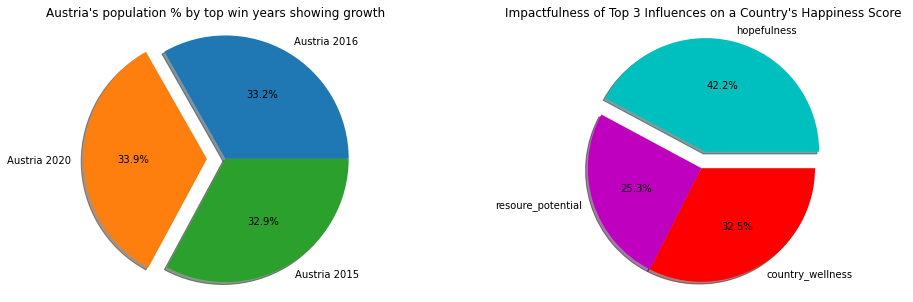

In [447]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
table_one=[8736491.0,8907780.0,8642422.0]
Seg_labels=['Austria 2016', 'Austria 2020', 'Austria 2015']


plt.title("Austria's population % by top win years showing growth")
plt.pie(table_one, labels=Seg_labels, shadow=True, autopct='%0.1f%%', explode=[0,0.15,0] )
plt.axis('equal')

table_two=[8.705567,5.229759,6.711567]
Seg_labels=['hopefulness','resoure_potential', 'country_wellness']

plt.subplot(1,2,2)
colors = ['c','m','r']
plt.title("Impactfulness of Top 3 Influences on a Country's Happiness Score")
plt.pie(table_two, labels=Seg_labels, shadow=True, autopct='%0.1f%%', colors = colors, explode=[0.15,0,0] )
plt.axis('equal')
plt.show()


In [365]:
coldest=visdf.sort_values(by=['Coldest'], ascending=[False])

In [366]:
hottest=visdf.sort_values(by=['Hottest'], ascending=[False])

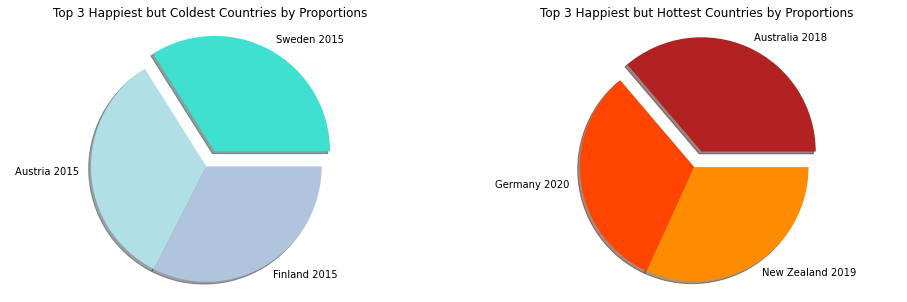

In [367]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

colorz = ['turquoise','powderblue','lightsteelblue']
table_one=[63.4,62.7,60.7]
Seg_labels=['Sweden 2015', 'Austria 2015', 'Finland 2015']
plt.title("Top 3 Happiest but Coldest Countries by Proportions")
plt.pie(table_one, labels=Seg_labels, shadow=True, colors=colorz, explode=[0.15,0,0] )
plt.axis('equal')

table_two=[123.3,108.7,108.3]
Seg_labels=['Australia 2018','Germany 2020', 'New Zealand 2019']

plt.subplot(1,2,2)
plt.title("Top 3 Happiest but Hottest Countries by Proportions")
colors = ['firebrick','orangered','darkorange']
plt.pie(table_two, labels=Seg_labels, shadow=True, colors = colors, explode=[0.15,0,0] )
plt.axis('equal')
plt.show()

In [380]:
import numpy as np

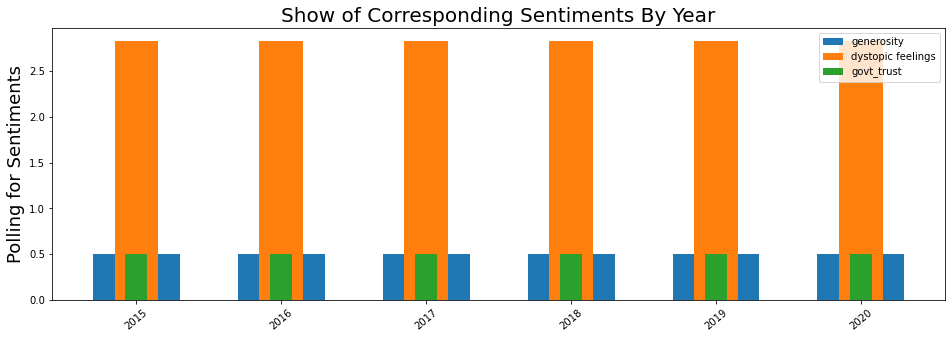

In [450]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=40)
plt.ylabel('Polling for Sentiments', fontsize=18)
plt.title("Show of Corresponding Sentiments By Year", fontsize=20)
xpositions=visdf.year
plt.bar(xpositions,visdf['generosity'], width=0.6, label='generosity')
plt.bar(xpositions,visdf['dystopia_res'], width=0.3, label='dystopic feelings')
plt.bar(xpositions,visdf['govt_trust'], width=0.15, label='govt_trust')
plt.legend()

# Summary

250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. 

What I learned to complete the project consisted of both new methods from curriculum sources and extended personal research. This endevour spanned across several aspects of the project itself and was touched on for many different steps. Steps consisting of pulling sources, cleaning data, storing elements, and creating visualizations. In some instances, researching ways to either simplify or enhance the output or process, was a sought endeavor that included the scopes beyond provided sources. However, through the week's course work or by each venture of self discovery, these quests of building knowledge led to both better insights on subject matter and a gained sense of accomplishment. I was especially pleased to learn more of SQL structure and commands, as I know this will be a likely and continuous source for data in the real world. 

As for the ethical implications to the chosen topic and handling/cleaning of the data, There are two main thoughts. First with regards to the handling of the data. I had sourced a previously established survey and allocated the datasets regarding different countries and years of acquisition. Although I did not have complete background knowledge to explain the means nor reliability of the data measures and subsequent inputs, I was provided a relatively easy to understand schema of the dataset's metrics. Considering these presuppositions, I was able to construct and munge the contending datasets in a useable manner with assigned limits to each individual dataset. However, as an ethical consideration I have to take into account the sources reliability, and my own effect in removing elements due to missing data or non-comparable datapoints. 

As for the second aspect regarding ethical implications via the chosen topic, I wanted to do my best to avoid bias in how I approached the data collected. Ultimately, I had to formulate the most complementry datasets to the existing topic selection dataset of surveyed happiness. I therefore chose to incorporate datasets that offored the most comprable and accessible data accross all 3 sets, as opposed to ensuring for the most accurate and reliable datasets for all 3. This could have a weighted impact on drawn conclusions and due to the differing variances of comparable feature selections, I recognize a limit to the scope of full discovery. 

Also, it is likely that taking a hands on approach for an achievable "happiness_score" that is derived from multiple sources and perspectives/cultures, can carry a considerable disadvantage for a singularity in the output. Afterall, what is happiness to one person could be taken for granted by another. Additionaly, at the extreme of this perspective is the old adage of "One man's Heaven, can be another man's Hell". Therefore, ethical applications to assigning quantifiable feelings become a very speculative means by their very nature. It is assumed that all assignments regarding this purpose or expression in any given calculation is borne out by the interpretations under examination. The chosen topic for this particular project was riddled with subjective analysis material, and the application of these measures were intended to serve as predictability measures for the impetus of the stability for a country. However, there is no way to ensure a direct correlation of feelings to outcomes at all levels of implementation. Furthermore, what is true or even felt today does not always project into tomorrow. Time is a moving force, filled with a plethora of compounding factors and amorphis compositions that are impactfull to perceived happiness at varying degrees. 